# Get Data

Etter å hatt fått alt dataen jeg vil analysere, åpner jeg filen og leser av for data. Dataen er omgjort til en liste.

In [47]:
from datetime import datetime
import matplotlib.pyplot as plt
import csv


file1 = "AAPL_max.csv"

with open(file1, encoding="utf-8-sig") as fil1:
    reader = csv.reader(fil1)
    next(reader) # Går forbi første linje
    data = list(reader)

file2 = "S&P 500.csv"

with open(file2, encoding="utf-8-sig") as fil2:
    reader = csv.reader(fil2)
    next(reader) # Går forbi første linje
    spy_data = list(reader)

## Få data

Jeg lager en liste med datoer og hvor mye aksjen kostet på det tidspunktet. I loopen skipper jeg første to linjene some er bare header row og ticker row, omgjør datoen til en tid og så finner prisen den dagen.

## Plot grafen

Lager en figur med visse størrelser, ploter dato og priser op mot hverandre, x aksen har tid, y aksen har prisen. Tittel er bare priser over tid, har bare en graf så legend er unødvendig. Lager en Grid for lesbarhet og viser grafen.

Dette gjør jeg for alle grafene under, bare endrer litt som jeg vil forklare, men ellers er alt det andre forklart her.

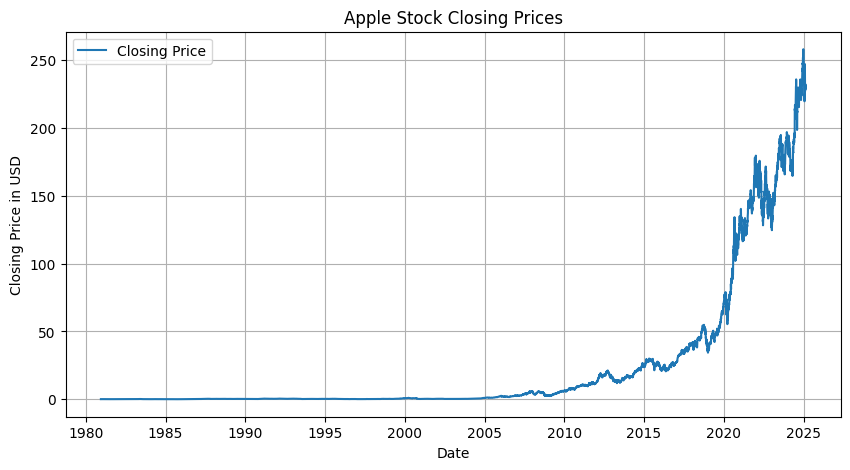

In [48]:
dates = []
closing_prices = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Volatilitet graf

Volatilitet, eller "implied volatility," er et mål på hvor sannsynlig det er at en aksjekurs vil endre seg. Høy volatilitet betyr større svingninger i prisen, mens lav volatilitet indikerer en mer stabil aksje. Ofte vil ustabile aksjer ha høy volatilitet, noe som betyr at prisen kan stige raskt, men også falle like brått.

Et kjent eksempel på en volatil aksje er GameStop (GME), som vist i grafen nedenfor:

![GME](https://s.yimg.com/ny/api/res/1.2/NbcO3douQEHy.7fCWtzCpA--/YXBwaWQ9aGlnaGxhbmRlcjt3PTk2MDtoPTU0MjtjZj13ZWJw/https://media.zenfs.com/en/tipranks_452/b1f96579db9395fa224098176188688d)

Her ser vi ekstreme svingninger i aksjeprisen, både opp og ned. For å måle en aksjes volatilitet ser vi ofte på endringer i prisen over én dag. Dersom en aksje har store daglige svingninger, tyder det på høy volatilitet og økt risiko.

## ATR-graf
ATR (Average True Range) er et verktøy for å måle volatilitet. Den beregner gjennomsnittet av daglige prisbevegelser, inkludert prisgap mellom handelsdager. Ved å plotte ATR kan vi se hvor mye en aksje endrer seg daglig og vurdere hvor ustabil den er. Gjør dette ved å ta prisen ved slutten av dagen minus prisen ved starten av dagen. Visuell representasjon under:

![ATR](https://blueberrymarkets.com/media/wsajkp40/average-true-range-chart.png)

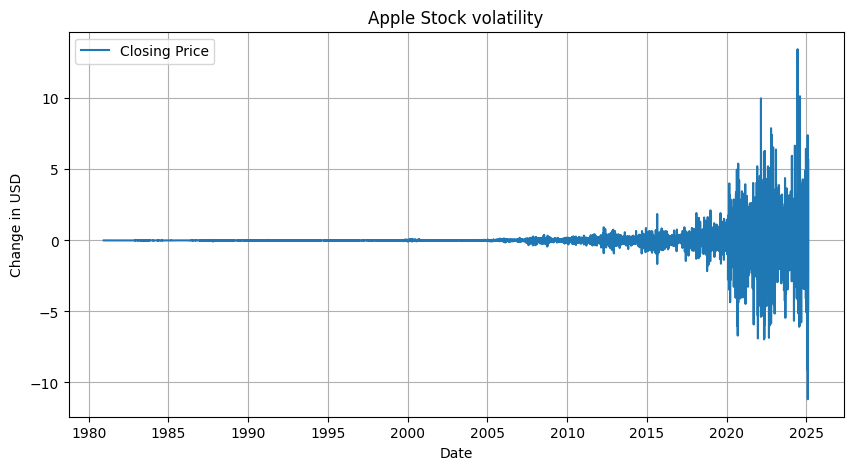

In [49]:
dates = []
volatility = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock volatility')
plt.legend()
plt.grid()
plt.show()

## Problemer med grafene

1. Det største problemet er lesbarheten, dette fikses ved å se nærmere på grafen, som jeg løser videre nedover.
2. Andre problemet er at uteliggere bemerkes veldig lett.
3. En annen utfordring er at grafen kan bli for overfylt og vanskelig å tolke når alle datapunkter vises samtidig. Det kan være vanskelig å identifisere trender og mønstre i dataene på grunn av støy fra mange datapunkter. Dette er hvorfor det er viktig å se nærmere på data.


## 1980-2003

Bare endrer indekseringen av dataen for å se nærmere på visse årstall (1980 til 2003).

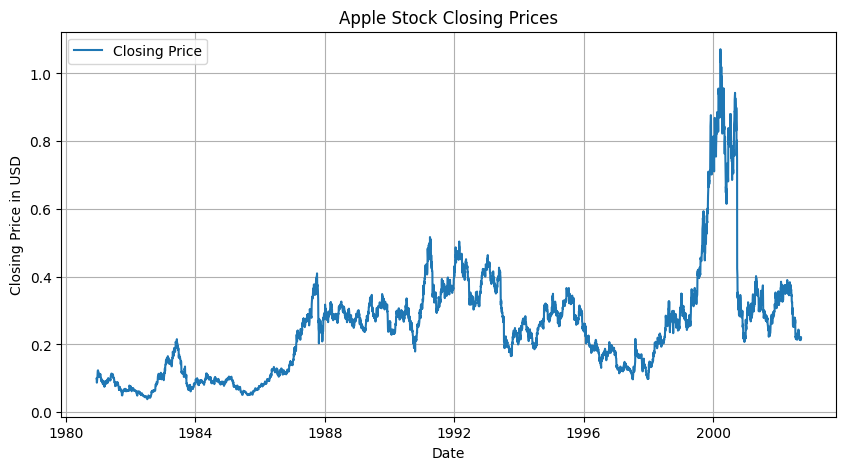

In [50]:
dates = []
closing_prices = []

for row in data[2:5500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Dot-com-boblen

Denne grafen viser utviklingen til Apple som selskap, samt hvordan dot-com-boblen påvirket teknologisektoren. En boble oppstår når investorer overinvesterer i et marked, noe som fører til kraftig prisvekst. Når det blir tydelig at aksjeprisene er kunstig høye sammenlignet med den reelle verdien, sprekker boblen, og prisene faller tilbake til et mer realistisk nivå.

Dot-com-boblen, som sprakk i 2000, påvirket hovedsakelig internettselskaper, men også enkelte teknologiaksjer. Apple var et teknologiselskap, men ikke et typisk dot-com-selskap. Under er bilde av hele dot-com boblen og viser det med hele markedet:

![Dot-Com](https://www.internethistorypodcast.com/wp-content/uploads/2016/12/Internet-bubble.gif)


Videre ser vi på svingningene i grafen rundt denne tidsperioden ved samme indeksering:

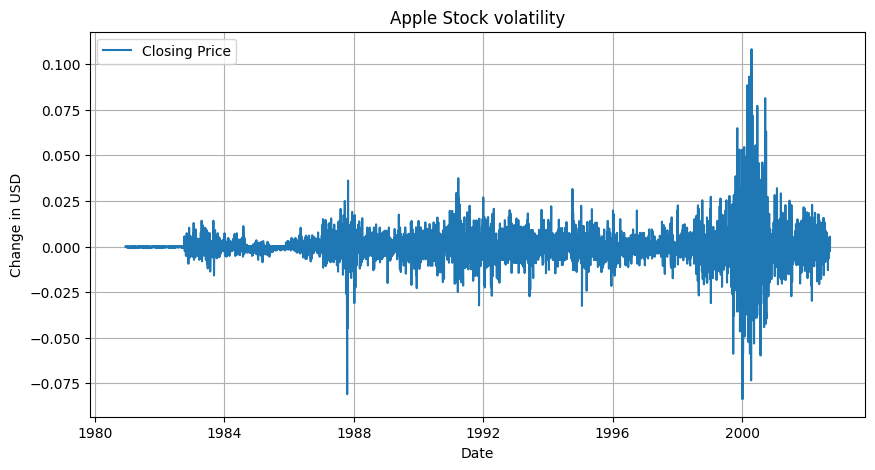

In [51]:
dates = []
volatility = []

for row in data[2:5500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock volatility')
plt.legend()
plt.grid()
plt.show()

## Volatilitet rundt dot-com-boblen
Vi ser at svingningene i aksjemarkedet før dot-com-boblen lå på rundt 10 % fra topp til bunn. På toppen av dot-com-boblen, da aksjer var kraftig overpriset, økte volatiliteten til nærmere 20 %. Når aksjer har så store svingninger, skaper det stor usikkerhet om den videre utviklingen – om man kan tjene på markedet, eller om verdiene plutselig kan falle drastisk.

## 1999–2011
Vi ser videre på aksjeprisene i en annen periode for å inkludere både dot-com-boblen i 2000 og finanskrisen i 2008. Dette gir et bredere bilde av hvordan markedet utviklet seg over tid.

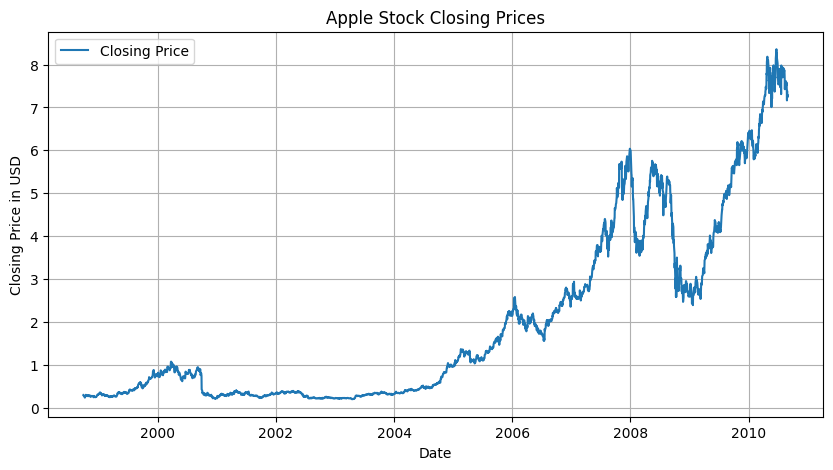

In [52]:
dates = []
closing_prices = []

for row in data[4500:7500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Volatilitet, sammenligning og finanskrisen
I perioden rundt dot-com-boblen var volatiliteten høy som vi så, da aksjemarkedet opplevde kraftige opp- og nedturer. Etter at boblen sprakk, stabiliserte markedet seg noelunde, men finanskrisen i 2008 førte igjen til stor usikkerhet og kraftige kursfall.

Apple var et av selskapene som opplevde betydelige svingninger i denne perioden. Under dot-com-boblen var selskapets aksjekurs påvirket av den generelle optimismen i teknologisektoren, men Apple hadde fortsatt utfordringer knyttet til selskapets økonomiske situasjon. Etter at Steve Jobs kom tilbake som leder på slutten av 1990-tallet, gjennomgikk Apple en strategisk endring som la grunnlaget for senere suksess.

I finanskrisen i 2008 falt Apples aksje kraftig sammen med resten av markedet, men selskapet kom raskt tilbake. Introduksjonen av produkter som iPhone bidro til at Apple styrket sin posisjon i markedet og opplevde en kraftig vekst i årene etterpå. Her er bilde som viser hvorfor grafen ser ut som "to tårn":

![Finanskrisen](https://www.thebalancemoney.com/thmb/LgPyi4Ejx54gYhUEe5su10GDPCM=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/what-caused-2008-global-financial-crisis-3306176_FINAL-14548e14071e4bdb90ff985fac727225.jpg)

Under ser vi grafen for volatiliteten.



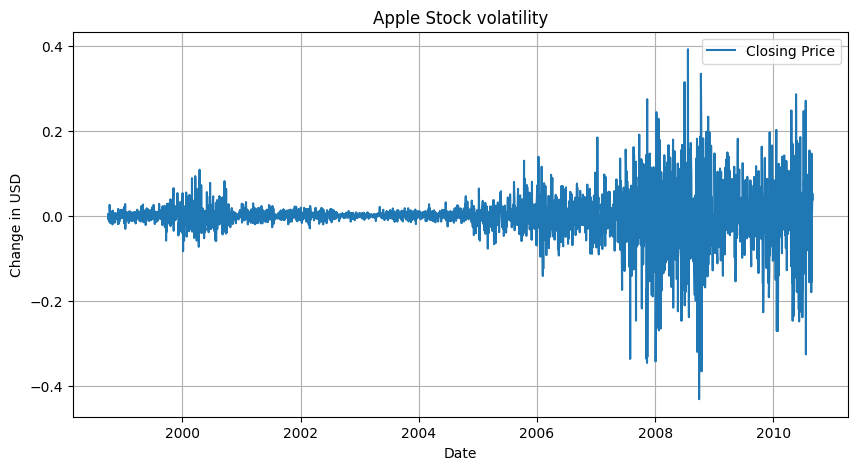

In [53]:
dates = []
volatility = []

for row in data[4500:7500]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock volatility')
plt.legend()
plt.grid()
plt.show()

## 2011 - Nå

Siden 2011 har Apples aksjeverdi vokst enormt, med en markedsverdi som har økt rundt tretti ganger. Suksessen skyldes i stor grad iPhone, samt utvidelsen av selskapets økosystem med produkter som Apple Watch og tjenester som App Store og iCloud. Til tross for perioder med svingninger har den langsiktige trenden vært sterk vekst, noe som har gjort Apple til et av verdens mest verdifulle selskaper.

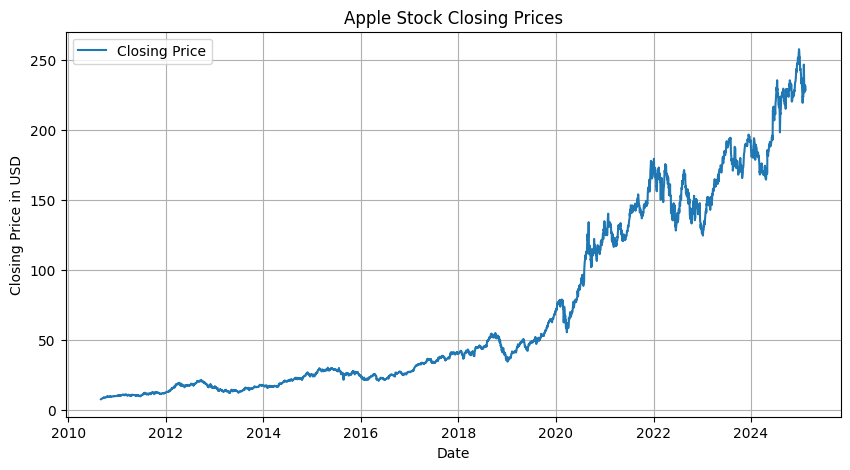

In [54]:
dates = []
closing_prices = []

for row in data[7500:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(dates, closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple Stock Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Nåtidens volatilitet - er vi i en boble?

Dagens aksjemarked preges av store svingninger, spesielt innen teknologiaksjer som Apple. Spørsmålet er om dette signaliserer en ny økonomisk boble eller bare normal markedsdynamikk.

Høy volatilitet kan skyldes flere faktorer, som renteendringer, geopolitisk usikkerhet og teknologiske skifter. For eksempel har sentralbankenes rentehevinger de siste årene påvirket investorers risikovilje, noe som kan føre til plutselige fall i aksjemarkedet. Samtidig har kunstig intelligens, skyteknologi og andre innovasjoner skapt optimisme, som driver aksjer opp.

For at det skal være en boble, må aksjeprisene være drevet mer av spekulasjon enn av selskapenes faktiske inntjening. Selv om teknologiaksjer som Apple har høye verdsettelser, har selskapet sterke inntektsstrømmer og en solid markedsposisjon, noe som kan indikere at vi ikke er i en boble – i hvert fall ikke en som ligner dot-com-boblen. Likevel er det alltid en risiko for at markedet korrigerer seg dersom investorforventningene blir for optimistiske.

Her er artikkel fra TheFinance som drøfter rundt dette:
https://thefinance.sg/2021/01/07/are-we-in-a-bubble-2/
![Boble](https://thefinance.sg/wp-content/uploads/2021/01/92231e63a6e70e2722900de317c67dc9.im-269378)

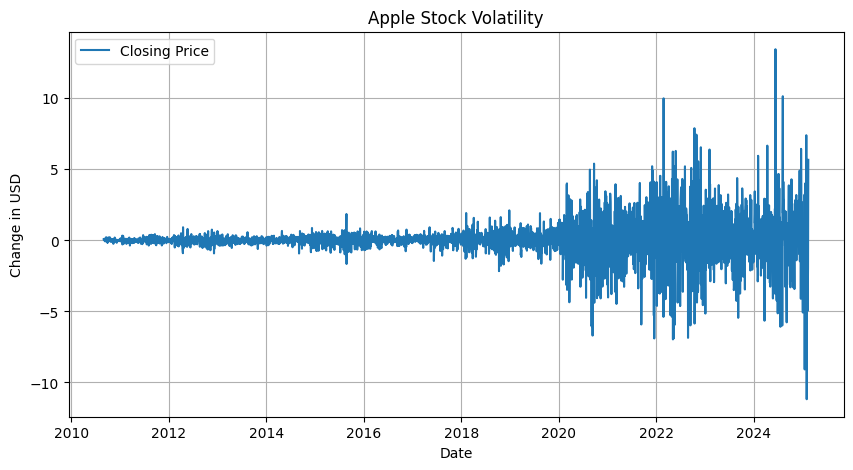

In [55]:
dates = []
Volatility = []

for row in data[7500:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    dates.append(date)
    change = float(row[1])-float(row[4])
    Volatility.append(change)

plt.figure(figsize=(10, 5))
plt.plot(dates, Volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Apple Stock Volatility')
plt.legend()
plt.grid()
plt.show()

# S&P 500

Vi ser på hvordan Apple har utviklet seg sammenlignet med det generelle markedet ved å bruke S&P 500, en aksjeindeks som representerer de 500 største børsnoterte selskapene i USA. S&P 500 er ikke et "indeksfond" i seg selv, men en indeks som gir en oversikt over de største selskapene på tvers av ulike sektorer. Siden indeksen inkluderer selskaper fra mange forskjellige bransjer, gir den et representativt bilde av hvordan det generelle markedet utvikler seg. Ved å sammenligne Apple med S&P 500 får vi en bedre forståelse av hvordan selskapet presterer i forhold til det brede markedet.

Mer informasjon om S&P 500 kan man se i denne lenken fra invetopedia:
https://www.investopedia.com/terms/s/sp500.asp
![S&P-500](https://www.investopedia.com/thmb/RSp-zAtT8dhKxjoCl0uFEaYsrzw=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/SP-500-Index-d04148d29bca4307b412f4fd91741e17.jpg)



## USA sin overrepresentasjon på det internasjonale aksjehandelen

Per slutten av 2023 utgjorde amerikanske selskaper omtrent 59 % av den globale aksjemarkedets totale verdi. Dette skyldes hovedsakelig den store markedsverdien til de viktigste amerikanske aksjeindeksene, som S&P 500, som alene representerer omtrent 51 % av den globale aksjemarkedets verdi. Samtidig utgjør USAs bruttonasjonalprodukt (BNP) omtrent 26 % av den globale totalen. Denne forskjellen antyder at det amerikanske aksjemarkedet er uforholdsmessig stort i forhold til landets økonomiske produksjon. Denne overrepresentasjonen av amerikanske aksjer på de globale markedene har ført til bekymring blant økonomer og investorer om potensielle markedsubalanser. Konsentrasjonen av markedsverdi i noen få store selskaper, som de såkalte "Magnificent Seven" (Apple, Microsoft, Nvidia, Alphabet, Amazon og Meta), er særlig merkbar. Disse selskapene har stått for nesten to tredjedeler av S&P 500s økning på 24 % tidlig i 2024, noe som understreker innflytelsen fra et lite antall selskaper på markedets utvikling. Dette kan føre til økt volatilitet og risiko for investorer som ikke har tilstrekkelig diversifisering. Dominansen til amerikanske aksjer kan også skygge for andre markeder, noe som kan begrense globale investeringsmuligheter og påvirke stabiliteten i internasjonale finanssystemer. Den store andelen amerikanske aksjer, sammenlignet med landets BNP, indikerer at det kan være en markedsubalanse som kan være usikker på lang sikt.

Det er viktig å vite om markedsubalensen i USA siden det kan tyde på at aksjene verdt mindre enn det de er solgt for. Som igjen tyder på at vi er i en boble.

## Apple og S&P 500 sammenligning

Fortsetter med Apple og S&P 500, plotter begge i samme graf:


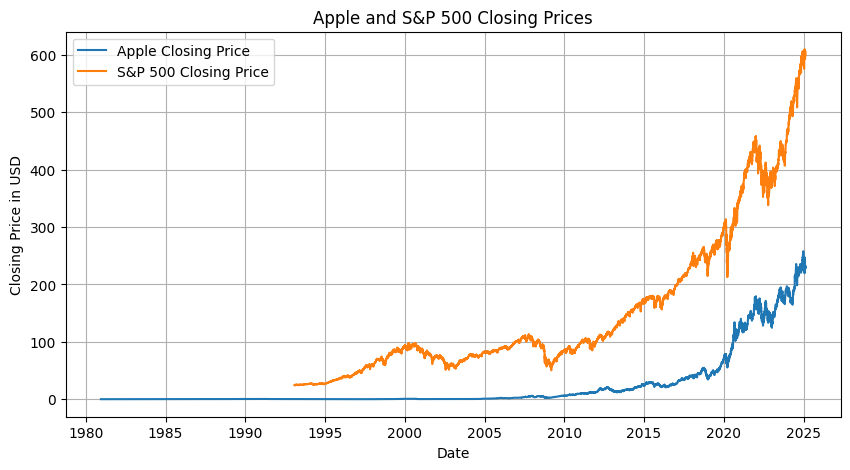

In [56]:

aapl_dates = []
aapl_closing_prices = []

for row in data[2:]:
    date_str = row[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')
    aapl_dates.append(date)
    aapl_closing_prices.append(float(row[4]))


spy_dates = []
spy_closing_prices = []

for row in spy_data[2:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    spy_closing_prices.append(float(row[4]))

# Plot both Apple and S&P 500 data on the same graph
plt.figure(figsize=(10, 5))
plt.plot(aapl_dates, aapl_closing_prices, label='Apple Closing Price')
plt.plot(spy_dates, spy_closing_prices, label='S&P 500 Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple and S&P 500 Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Problem

Dette problemet er at siden per aksje er S&P 500 mye større, er det vanskelig å sammenligne. Deler S&P 500 sine priser med 3 slik at det er lettere å sammenligne

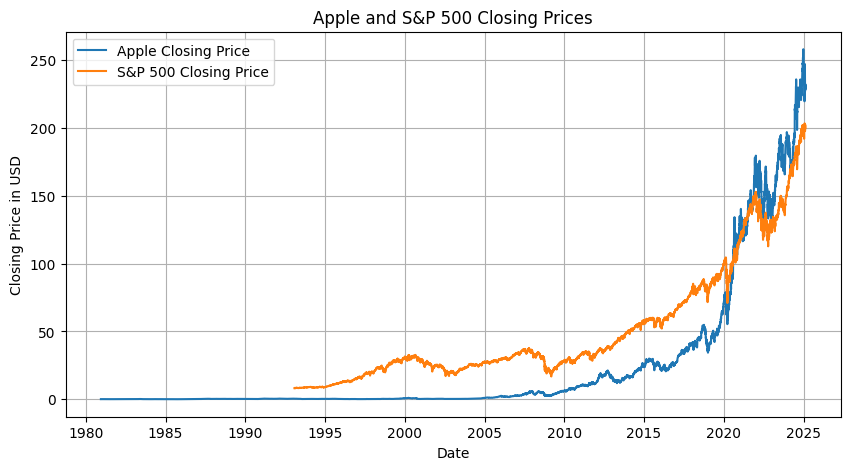

In [57]:
spy_dates = []
spy_closing_prices = []

for row in spy_data[2:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    spy_closing_prices.append((float(row[4]))/3)

plt.figure(figsize=(10, 5))
plt.plot(aapl_dates, aapl_closing_prices, label='Apple Closing Price')
plt.plot(spy_dates, spy_closing_prices, label='S&P 500 Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('Apple and S&P 500 Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Sammenligning mellom Apple og S&P 500

Her ser vi forskjellene blant Apple og S&P 500, Apple har grodd mye raskere enn det generelle markedet, som vi har sett med de fleste teknologiaksjene, som Nvidia. Dette skyldes en stor endring fra tidligere generasjoner hvor alt blir digitalt. For å være del av samfunn, må man være del av internettet. Apple en av firmaene som gir teknologiske produkter for å koble seg til internettet har profitert grådig mye, spesielt utrolig er at det fortsatt vokser ekstremt fort som største firmaet i hele verdenen. Siden Epidemien har det vært rett opp for Apple. Om vi er i en boble vil dette gå ned.

Personlig tror jeg at vi er i en boble som vil poppe før 2027, jeg mener den burde bli kalt "AI boblen" siden det kunstig intelligens har gitt oss, iforhold til pengene vi har investert er så lite. KI er fremtiden, men om det er verdt like mye som folk tror den er idag er noe helt annet.

## 2014 - Nå

S&P 500, eller det generelle markedet er blitt seks ganger større, på samme tid Apple har grodd åtti ganger så stor. Dette er noen av de raskeste endringene prosentvis vi har sett på markedet, og det ser ut til å ha fulgt en lineær trend.

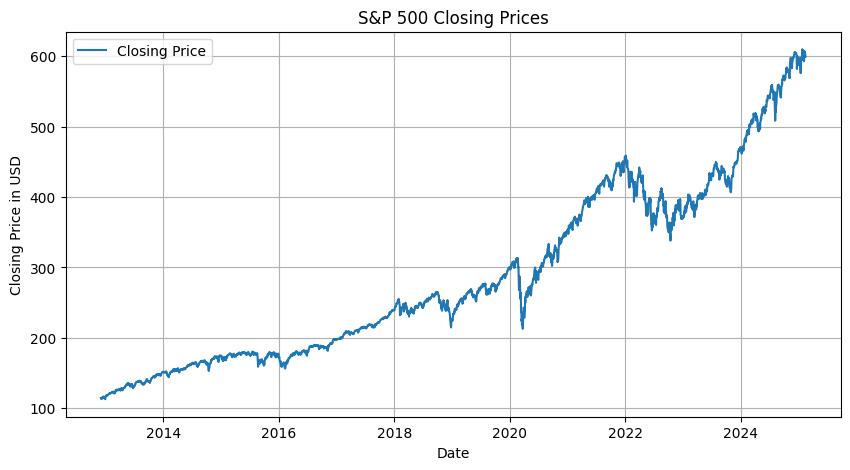

In [58]:
spy_dates = []
spy_closing_prices = []

for row in spy_data[5000:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    spy_closing_prices.append(float(row[4]))

plt.figure(figsize=(10, 5))
plt.plot(spy_dates, spy_closing_prices, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price in USD')
plt.title('S&P 500 Closing Prices')
plt.legend()
plt.grid()
plt.show()

## Visualisert

Jeg har visualisert de siste ti årene for S&P 500, kan se alle de store endringene, som da korona startet og masse av de generelle firmaene gikk konken og alt gikk ned. Ser også "NFT boblen" som sprakk rundt 2022, men etter dette har den gått videre opp.

## S&P 500 Volatilitet i forhold til Apple

S&P 500 har generelt mye mindre svingninger prosentvis sammenlignet med Apple, noe som tyder på at det er en tryggere investering. Dette skyldes at indeksen består av 500 store selskaper fra ulike sektorer, noe som gir en naturlig risikospredning. Apple, derimot, som en enkeltaksje, har større potensial for både rask vekst og brå fall. Selv om S&P 500 sjelden opplever de samme ekstreme kursøkningene som Apple har hatt de siste årene, gir den mer stabilitet og forutsigbarhet over tid, noe som gjør den til et attraktivt valg for langsiktige investorer. Under ser vi at de daglige variasjonene er bare rundt 5%, mye mindre enn noen av tidsperiodene med Apple som helhet. Dette viser hvor viktig variasjon i aksjer er for forsvarelig vekst. Mer om dette på Investopedia: https://www.investopedia.com/investing/importance-diversification/

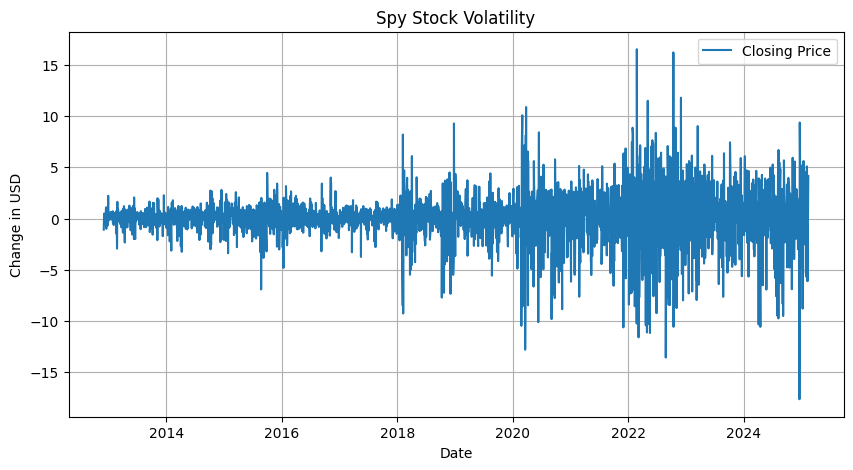

In [59]:
spy_volatility = []
spy_dates = []


for row in spy_data[5000:]:
    spy_date_str = row[0]
    spy_date = datetime.strptime(spy_date_str, '%Y-%m-%d')
    spy_dates.append(spy_date)
    spy_change = float(row[1])-float(row[4])
    spy_volatility.append(spy_change)



plt.figure(figsize=(10, 5))
plt.plot(spy_dates, spy_volatility, label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.title('Spy Stock Volatility')
plt.legend()
plt.grid()
plt.show()